In [1]:
import os
import shutil
import random
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
train_path = 'C:/Users/sudar/Downloads/Blood cell Cancer/Train'
test_path = 'C:/Users/sudar/Downloads/Blood cell Cancer/Test'
valid_path = 'C:/Users/sudar/Downloads/Blood cell Cancer/Validation'

In [4]:
categories = [category for category in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, category))]

# Get the number of categories
num_categories = len(categories)

print(f"The train dataset contains {num_categories} categories.")

The train dataset contains 4 categories.


In [5]:
categories2 = [category for category in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, category))]

# Get the number of categories
num_categories = len(categories2)

print(f"The test dataset contains {num_categories} categories.")

The test dataset contains 4 categories.


In [6]:
categories3 = [category for category in os.listdir(valid_path) if os.path.isdir(os.path.join(valid_path, category))]

# Get the number of categories
num_categories = len(categories3)

print(f"The validation dataset contains {num_categories} categories.")

The validation dataset contains 4 categories.


In [7]:
category_counts = {}

categories = [category for category in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, category))]

for category in categories:
    category_dir = os.path.join(train_path, category)
    image_files = [filename for filename in os.listdir(category_dir) if filename.endswith(('.jpg', '.png', '.jpeg', '.gif'))]
    category_counts[category] = len(image_files)

for category, count in category_counts.items():
    print(f"Category: {category}, Number of Images: {count}")

Category: Benign, Number of Images: 409
Category: [Malignant] early Pre-B, Number of Images: 783
Category: [Malignant] Pre-B, Number of Images: 764
Category: [Malignant] Pro-B, Number of Images: 636


In [8]:
category_counts = {}

categories = [category for category in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, category))]

for category in categories:
    category_dir = os.path.join(test_path, category)
    image_files = [filename for filename in os.listdir(category_dir) if filename.endswith(('.jpg', '.png', '.jpeg', '.gif'))]
    category_counts[category] = len(image_files)

for category, count in category_counts.items():
    print(f"Category: {category}, Number of Images: {count}")

Category: Benign, Number of Images: 51
Category: [Malignant] early Pre-B, Number of Images: 97
Category: [Malignant] Pre-B, Number of Images: 95
Category: [Malignant] Pro-B, Number of Images: 79


In [9]:
category_counts = {}

categories = [category for category in os.listdir(valid_path) if os.path.isdir(os.path.join(valid_path, category))]

for category in categories:
    category_dir = os.path.join(valid_path, category)
    image_files = [filename for filename in os.listdir(category_dir) if filename.endswith(('.jpg', '.png', '.jpeg', '.gif'))]
    category_counts[category] = len(image_files)

for category, count in category_counts.items():
    print(f"Category: {category}, Number of Images: {count}")

Category: Benign, Number of Images: 52
Category: [Malignant] early Pre-B, Number of Images: 99
Category: [Malignant] Pre-B, Number of Images: 96
Category: [Malignant] Pro-B, Number of Images: 81


In [10]:
def count_images_in_directory(directory):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif']
    image_count = 0
    for root, _, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_count += 1
    return image_count

# Count the number of images in the training and testing directories
train_image_count = count_images_in_directory(train_path)
test_image_count = count_images_in_directory(test_path)
valid_image_count = count_images_in_directory(valid_path)

print(f"Total number of images in training folder: {train_image_count}")
print(f"Total number of images in testing folder: {test_image_count}")
print(f"Total number of images in validation folder: {valid_image_count}")

Total number of images in training folder: 2592
Total number of images in testing folder: 322
Total number of images in validation folder: 328


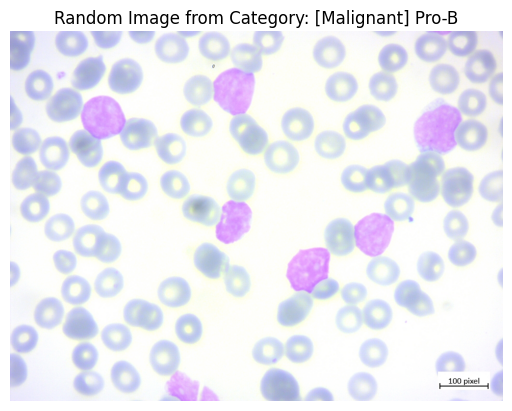

Category Folder: [Malignant] Pro-B


In [13]:
import random
from PIL import Image
import matplotlib.pyplot as plt

categories = [category for category in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, category))]

random_category = random.choice(categories)

category_dir = os.path.join(train_path, random_category)
image_files = [os.path.join(category_dir, filename) for filename in os.listdir(category_dir)]

random_image_path = random.choice(image_files)

random_image = Image.open(random_image_path)
plt.imshow(random_image)
plt.title(f"Random Image from Category: {random_category}")
plt.axis('off')
plt.show()

print(f"Category Folder: {random_category}")

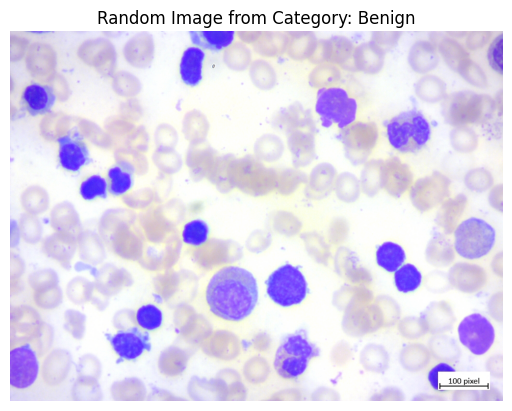

Category Folder: Benign


In [14]:
import random
from PIL import Image
import matplotlib.pyplot as plt

categories = [category for category in os.listdir(valid_path) if os.path.isdir(os.path.join(valid_path, category))]

random_category = random.choice(categories)

category_dir = os.path.join(valid_path, random_category)
image_files = [os.path.join(category_dir, filename) for filename in os.listdir(category_dir)]

random_image_path = random.choice(image_files)

random_image = Image.open(random_image_path)
plt.imshow(random_image)
plt.title(f"Random Image from Category: {random_category}")
plt.axis('off')
plt.show()


print(f"Category Folder: {random_category}")

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
img_height,img_width=224,224
batch_size=32
train_ds = train_datagen.flow_from_directory(
  train_path,
  seed=42,
  class_mode ='categorical',
  target_size=(img_height, img_width),
  batch_size=batch_size)

Found 2592 images belonging to 4 classes.


In [19]:
img_height,img_width=224,224
batch_size=32
test_ds = test_datagen.flow_from_directory(
  test_path,
  seed=42,
  class_mode ='categorical',
  target_size=(img_height, img_width),
  batch_size=batch_size)

Found 322 images belonging to 4 classes.


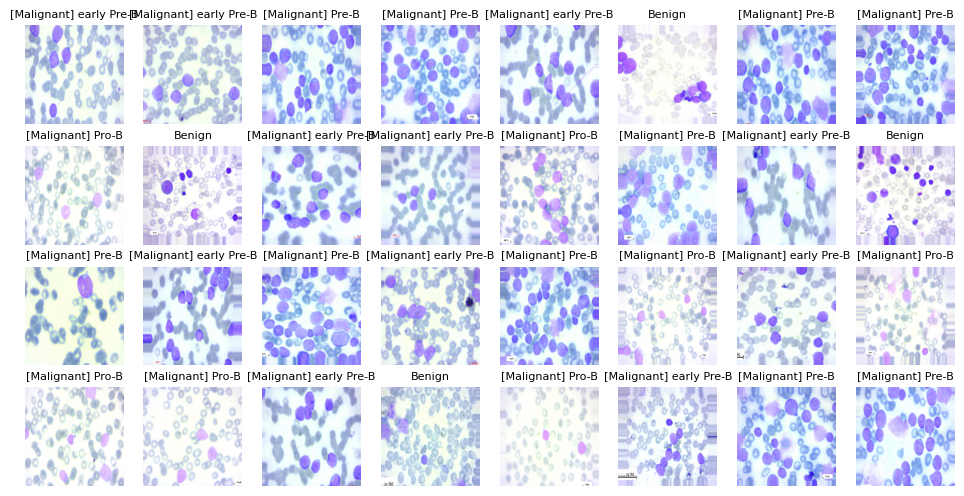

In [20]:
import matplotlib.pyplot as plt

batch_images, batch_labels = next(train_ds)

class_labels = train_ds.class_indices

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
axes = axes.ravel()

for i in range(batch_images.shape[0]):
    img = batch_images[i]
    label_index = batch_labels[i].argmax() 
    label = list(class_labels.keys())[list(class_labels.values()).index(label_index)]
    axes[i].imshow(img)
    axes[i].set_title(label, fontsize=8)
    axes[i].axis('off')

plt.show()

In [21]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

In [22]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG19(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512,activation='relu'))
vgg_model.add(Dense(512,activation='relu'))
vgg_model.add(Dense(512,activation='relu'))
vgg_model.add(Dense(4, activation='softmax'))

In [23]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 module_wrapper (ModuleWrap  (None, 512)               0         
 per)                                                            
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 4)                 2052      
                                                        

In [24]:
vgg_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
epochs=5
history = vgg_model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/5
81/81 [==============================] - 430s 5s/step - loss: 0.6457 - accuracy: 0.7415 - val_loss: 0.3754 - val_accuracy: 0.8478
Epoch 2/5
81/81 [==============================] - 440s 5s/step - loss: 0.2834 - accuracy: 0.8927 - val_loss: 0.1858 - val_accuracy: 0.9379
Epoch 3/5
81/81 [==============================] - 452s 6s/step - loss: 0.1996 - accuracy: 0.9263 - val_loss: 0.1736 - val_accuracy: 0.9503
Epoch 4/5
81/81 [==============================] - 406s 5s/step - loss: 0.1699 - accuracy: 0.9375 - val_loss: 0.0705 - val_accuracy: 0.9814
Epoch 5/5
81/81 [==============================] - 456s 6s/step - loss: 0.1614 - accuracy: 0.9429 - val_loss: 0.1014 - val_accuracy: 0.9658


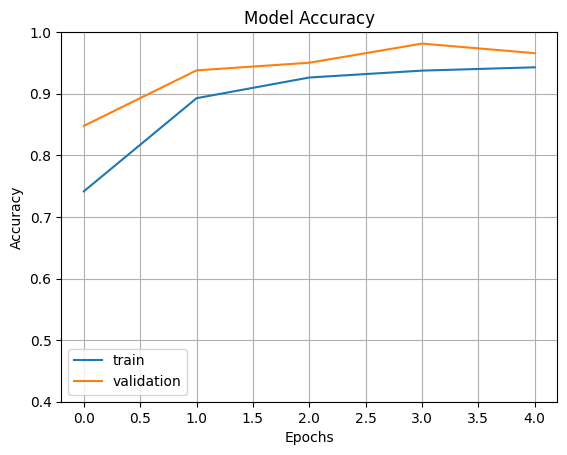

In [26]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

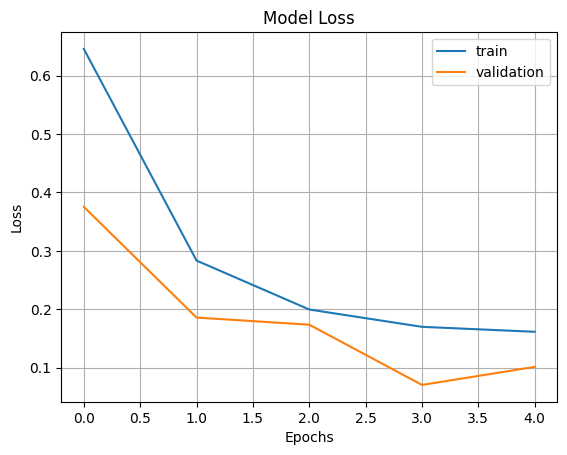

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [28]:
valid_datagen = ImageDataGenerator(rescale=1.0/255)
valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical', 
    shuffle=False 
)

Found 328 images belonging to 4 classes.


In [29]:
predictions = vgg_model.predict(valid_generator, verbose=1)

predicted_class_indices = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
true_labels = valid_generator.classes
predicted_labels = np.argmax(predictions, axis=1)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Validation Accuracy:", accuracy)

11/11 [==============================] - 56s 5s/step
Validation Accuracy: 0.9573170731707317


In [30]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [31]:
model = Sequential()

pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(4, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 module_wrapper_1 (ModuleWr  (None, 1280)              0         
 apper)                                                          
                                                                 
 dense_4 (Dense)             (None, 512)               655872    
                                                                 
 dense_5 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 2915908 (11.12 MB)
Trainable params: 657924 (2.51 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [33]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/5
81/81 [==============================] - 101s 1s/step - loss: 0.3331 - accuracy: 0.8765 - val_loss: 0.3735 - val_accuracy: 0.8323
Epoch 2/5
81/81 [==============================] - 87s 1s/step - loss: 0.1242 - accuracy: 0.9572 - val_loss: 0.0788 - val_accuracy: 0.9752
Epoch 3/5
81/81 [==============================] - 98s 1s/step - loss: 0.0868 - accuracy: 0.9688 - val_loss: 0.0720 - val_accuracy: 0.9720
Epoch 4/5
81/81 [==============================] - 91s 1s/step - loss: 0.0849 - accuracy: 0.9711 - val_loss: 0.1135 - val_accuracy: 0.9565
Epoch 5/5
81/81 [==============================] - 91s 1s/step - loss: 0.0750 - accuracy: 0.9753 - val_loss: 0.0567 - val_accuracy: 0.9814


In [35]:
predictions_new = model.predict(valid_generator, verbose=1)

predicted_class_indices = np.argmax(predictions_new, axis=1)

from sklearn.metrics import accuracy_score
true_labels = valid_generator.classes
predicted_labels = np.argmax(predictions_new, axis=1)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Validation Accuracy:", accuracy)

11/11 [==============================] - 7s 547ms/step
Validation Accuracy: 0.9847560975609756


In [36]:
from keras.models import load_model

In [38]:
model.save('BloodCancerCell.h6')

INFO:tensorflow:Assets written to: BloodCancerCell.h6\assets


INFO:tensorflow:Assets written to: BloodCancerCell.h6\assets
